In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('SMSSpamCollection.txt', sep='\t', header=None, names=['label', 'message'])

df


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
column_types = df.dtypes

print("Data types of all columns:")
print(column_types)

Data types of all columns:
label      object
message    object
dtype: object


In [4]:
# Feature engineering
df['length_of_message'] = df['message'].apply(len)
df['number_of_capital_letters'] = df['message'].apply(lambda x: sum(1 for char in x if char.isupper()))
# Add at least one more feature based on your knowledge

In [5]:
# Create the feature matrix X
X = df[['length_of_message', 'number_of_capital_letters']]  # Add the additional features

# Create the target vector y
df['label'] = df['label'].map({'spam': 1, 'ham': 0})
y = df['label']

In [6]:
# Partition the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=419)

In [7]:
# Fit a KNN classifier with default parameters
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Get default value for k
default_k_value = knn_classifier.n_neighbors

# Report accuracy on training and testing sets
train_accuracy = knn_classifier.score(X_train, y_train)
test_accuracy = knn_classifier.score(X_test, y_test)

# Print the results
print(f"Default value for k: {default_k_value}")
print(f"Training accuracy: {train_accuracy}")
print(f"Testing accuracy: {test_accuracy}")

Default value for k: 5
Training accuracy: 0.9488445142472515
Testing accuracy: 0.9264573991031391


In [9]:
# Generate a plot of training and testing errors as functions of k
ks = list(range(1, 26, 2))  # Odd values of k from 1 to 25
train_error = []
test_error = []

for k in ks:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    train_error.append(1 - knn_classifier.score(X_train, y_train))
    test_error.append(1 - knn_classifier.score(X_test, y_test))


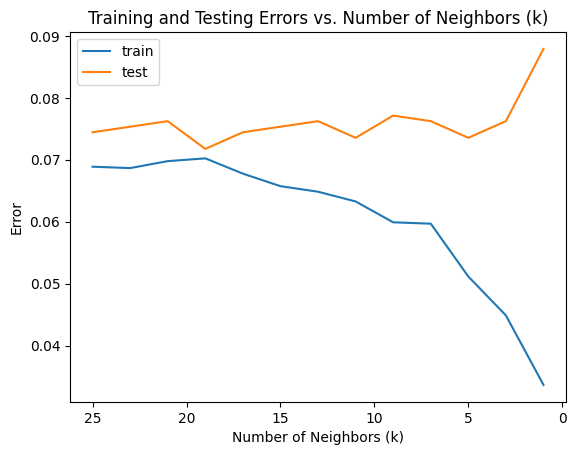

In [10]:
# Plot the errors
fig, ax = plt.subplots()
ax.plot(ks, train_error, label='train')
ax.plot(ks, test_error, label='test')
ax.legend()
ax.invert_xaxis()
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error')
plt.title('Training and Testing Errors vs. Number of Neighbors (k)')
plt.show()

In [11]:
# Find the recommended value for k
recommended_k = ks[test_error.index(min(test_error))]
print(f"Recommended value for k: {recommended_k}")

Recommended value for k: 19


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/esnt/Data/master/CleanData/Brazil%20rents%20sm.csv"
df = pd.read_csv(url)

In [ ]:
# Extract features and target variable
X = df.drop('log_rent', axis=1)
y = df['log_rent']


In [ ]:
# a. Fit a KNN regression model with k = 10
knn_regressor = KNeighborsRegressor(n_neighbors=10)
knn_regressor.fit(X, y)

# Compute training RMSE
train_predictions = knn_regressor.predict(X)
training_rmse = np.sqrt(mean_squared_error(y, train_predictions))
print(f"Training RMSE: {training_rmse}")

In [ ]:
# b. 5-fold cross-validation to estimate generalizable RMSE
cv_scores_5fold = cross_val_score(knn_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
mean_rmse_5fold = np.sqrt(-cv_scores_5fold.mean())
print(f"Mean RMSE (5-fold cross-validation): {mean_rmse_5fold}")

In [ ]:
# c. Compare different cross-validation techniques
fold_sizes = [2, 5, 10, 20, 50]
results = []

for fold_size in fold_sizes:
    cv_scores = cross_val_score(knn_regressor, X, y, cv=fold_size, scoring='neg_mean_squared_error')
    mean_rmse = np.sqrt(-cv_scores.mean())
    std_rmse = np.sqrt(cv_scores.std())
    results.append({'Folds': fold_size, 'Mean RMSE': mean_rmse, 'Std RMSE': std_rmse})

# Create a table or plot summarizing the results
results_df = pd.DataFrame(results)
print(results_df)

In [ ]:
# d. Partition the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=307)

# Compute test RMSE for the first random state
test_predictions_1 = knn_regressor.predict(X_test)
test_rmse_1 = np.sqrt(mean_squared_error(y_test, test_predictions_1))
print(f"Test RMSE (Random State 307): {test_rmse_1}")

In [ ]:
# e. Repeat part (d) using a different random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)  # Use a different random state
test_predictions_2 = knn_regressor.predict(X_test)
test_rmse_2 = np.sqrt(mean_squared_error(y_test, test_predictions_2))
print(f"Test RMSE (Different Random State): {test_rmse_2}")